# Importing Modules

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,AveragePooling2D
import os
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Dataset

In [2]:
DIRECTORY="C:\\Users\\asus\\Downloads\\archive (8)\\dogscats\\train"
CATEGORY=['dogs','cats']

# Preprocessing Data

In [3]:
data=[]
image_size=64
for category in CATEGORY:
    img_dir=os.path.join(DIRECTORY,category)#joining the class directries to the existing directory 
    for images in os.listdir(img_dir):
        img_path=os.path.join(img_dir,images)#joining all the images directories inside the class directory 
        label=CATEGORY.index(category)
        image_arr=cv2.imread(img_path)#converting images into an array
        image_arr=cv2.resize(image_arr, (image_size,image_size))#resizing the images size to be equal 
        data.append([image_arr,label])#storing these array of images into a list to perform furture classifications
        
random.shuffle(data)#shuffling the dataset elements for the better results 
#loading the inputs in a list 'x' and labels in another list 'y'
x=[]
y=[]
for i,j in data:
    x.append(i)
    y.append(j)
x=np.array(x)
y=np.array(y)
x=x/255 #assaigning pixel value in the range(0,1)
x.shape
#splitting the dataset for the testing of accuracy 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Creating the CNN for feature extraction

In [4]:
model=Sequential()
model.add(Conv2D(16,strides=(1,1),kernel_size=3,activation='ReLU'))#dot product of kernel matrics and input array
model.add(AveragePooling2D(strides=(2,2)))#collecting the average values from the output matrics of convo layer
model.add(Conv2D(128,strides=(1,1),kernel_size=3,activation='ReLU'))#repeat the kernel process of dot product
model.add(AveragePooling2D(strides=(2,2)))#taking the average value from the output of previous layer
model.add(Flatten())#converting all the values into one single column to fed to the fully connected neral network(Dense)
model.add(Dense(128,activation='ReLU'))#fully connected neural network
model.add(Dense(1,activation='sigmoid'))#output layer

# Configuration Of Neural Network

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Training Neural Network

In [6]:
model.fit(x_train,y_train,epochs=15,validation_split=0.1)

Epoch 1/15


518/518 [==============================] - 22s 41ms/step - loss: 0.6305 - accuracy: 0.6425 - val_loss: 0.5810 - val_accuracy: 0.6864
Epoch 2/15
518/518 [==============================] - 22s 42ms/step - loss: 0.5569 - accuracy: 0.7136 - val_loss: 0.5357 - val_accuracy: 0.7342
Epoch 3/15
518/518 [==============================] - 22s 42ms/step - loss: 0.4985 - accuracy: 0.7579 - val_loss: 0.4857 - val_accuracy: 0.7685
Epoch 4/15
518/518 [==============================] - 22s 42ms/step - loss: 0.4526 - accuracy: 0.7896 - val_loss: 0.4716 - val_accuracy: 0.7793
Epoch 5/15
518/518 [==============================] - 22s 42ms/step - loss: 0.4047 - accuracy: 0.8129 - val_loss: 0.4401 - val_accuracy: 0.7962
Epoch 6/15
518/518 [==============================] - 22s 42ms/step - loss: 0.3546 - accuracy: 0.8434 - val_loss: 0.4957 - val_accuracy: 0.7755
Epoch 7/15
518/518 [==============================] - 22s 42ms/step - loss: 0.3058 - accuracy: 0.8708 - val_loss: 0.5013 - val_accurac

# Evaluating for the accuracy

In [7]:
evaluation=model.evaluate(x_test,y_test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

144/144 [==============================] - 1s 8ms/step - loss: 1.0219 - accuracy: 0.7807
Test Accuracy: 78.07%


# Prediction

1/1 [==============================] - 0s 92ms/step
The model predicts that the image is a Cat.


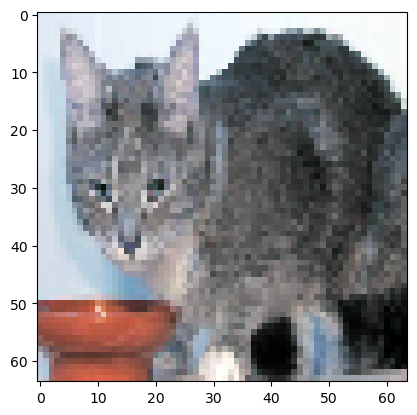

In [8]:
# Load the image you want to predict
image_path ="C:/Users/asus/Downloads/archive (8)/dogscats/train/cats/cat.9957.jpg"
new_image = cv2.imread(image_path)
new_image = cv2.resize(new_image, (image_size, image_size))  # Resize to match your model's input size
new_image = np.array([new_image / 255.0])  # Normalize the pixel values and convert to a numpy array

# Make predictions
predictions = model.predict(new_image)

# Convert the prediction to a human-readable label
predicted_label = "Cat" if predictions[0][0] > 0.5 else "Dog"

print(f"The model predicts that the image is a {predicted_label}.")
# Display the image
plt.imshow(new_image[0], cmap='gray')  # Specify 'gray' colormap for grayscale images
plt.show()